# Desafio 3

Neste desafio, iremos praticar nossos conhecimentos sobre distribuições de probabilidade. Para isso,
dividiremos este desafio em duas partes:
    
1. A primeira parte contará com 3 questões sobre um *data set* artificial com dados de uma amostra normal e
    uma binomial.
2. A segunda parte será sobre a análise da distribuição de uma variável do _data set_ [Pulsar Star](https://archive.ics.uci.edu/ml/datasets/HTRU2), contendo 2 questões.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

In [2]:
#%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

## Parte 1

### _Setup_ da parte 1

In [3]:
np.random.seed(42)
    
dataframe = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=10000),
                     "binomial": sct.binom.rvs(100, 0.2, size=10000)})

## Inicie sua análise a partir da parte 1 a partir daqui

In [4]:
# Sua análise da parte 1 começa aqui.
df = dataframe.copy()
df.head()

,normal,binomial
0,21.986857,18
1,19.446943,15
2,22.590754,14
3,26.092119,15
4,19.063387,21


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
normal,10000.0,19.991456,4.013850,4.310399,17.309638,19.98962,22.684324,35.704951
binomial,10000.0,20.097000,4.041191,6.000000,17.000000,20.00000,23.000000,36.000000


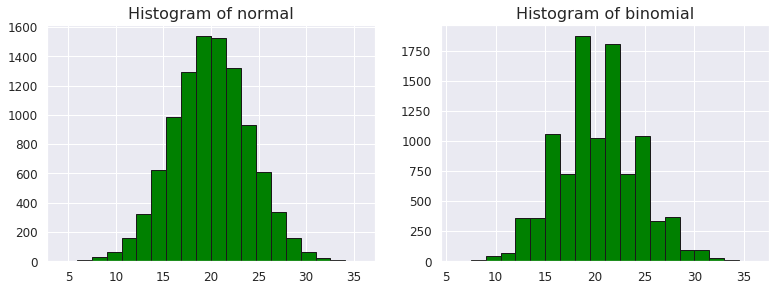

In [6]:
# Como são graficamente as duas distribuições
sns.set(style = 'darkgrid', palette = 'bright')
i = 1
plt.figure(figsize = (20,20))
for c in df.describe().columns:
    plt.subplot(4, 3, i)
    plt.title(f"Histogram of {c}", fontsize = 16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.hist(df[c], bins = 20, color = 'green', edgecolor = 'k')
    i += 1
plt.show()    

## Questão 1

Qual a diferença entre os quartis (Q1, Q2 e Q3) das variáveis `normal` e `binomial` de `dataframe`? Responda como uma tupla de três elementos arredondados para três casas decimais.

Em outra palavras, sejam `q1_norm`, `q2_norm` e `q3_norm` os quantis da variável `normal` e `q1_binom`, `q2_binom` e `q3_binom` os quantis da variável `binom`, qual a diferença `(q1_norm - q1 binom, q2_norm - q2_binom, q3_norm - q3_binom)`?

In [7]:
def q1():
    # Retorne aqui o resultado da questão 1.
    """Calcula a diferença entre os quantis da normal e os quantis da binomial"""
    # Cálculo da diferença entre os quantis
    diff = (df.normal.quantile([0.25, 0.5, 0.75]) - df.binomial.quantile([0.25, 0.5, 0.75]))
    answer_q1 = tuple(round(diff, 3))
    return answer_q1

Para refletir:

* Você esperava valores dessa magnitude?
  Devido ao número de amostras n = 10³, tinha inferido que a diferença ia ser pequena.
* Você é capaz de explicar como distribuições aparentemente tão diferentes (discreta e contínua, por exemplo) conseguem dar esses valores?
  Apesar de serem distribuições discreta - binomial, e normal - contínua, temos duas situações ocorrendo em paralelo, a lei dos grandes números e o teorema do limite central que a soma de variáveis aleatórias tendem a uma distribuição quando o número de amostras tende ao infinito.

## Questão 2

Considere o intervalo $[\bar{x} - s, \bar{x} + s]$, onde $\bar{x}$ é a média amostral e $s$ é o desvio padrão. Qual a probabilidade nesse intervalo, calculada pela função de distribuição acumulada empírica (CDF empírica) da variável `normal`? Responda como uma único escalar arredondado para três casas decimais.

In [8]:
def q2():
    # Retorne aqui o resultado da questão 2.
    """Cálculo da probabilidade pela ECDF sobre um intervalo dado"""
    ecdf = ECDF(df.normal)
    mu, sigma = df.normal.mean(), df.normal.std()
    prob_interval = float(ecdf(mu + sigma) - ecdf(mu - sigma))
    answer_q2 = round(prob_interval, round(3))
    return answer_q2

Para refletir:

* Esse valor se aproxima do esperado teórico?
  Sim, já que está dentro da regra "69-95-99.7".
* Experimente também para os intervalos $[\bar{x} - 2s, \bar{x} + 2s]$ e $[\bar{x} - 3s, \bar{x} + 3s]$.

## Questão 3

Qual é a diferença entre as médias e as variâncias das variáveis `binomial` e `normal`? Responda como uma tupla de dois elementos arredondados para três casas decimais.

Em outras palavras, sejam `m_binom` e `v_binom` a média e a variância da variável `binomial`, e `m_norm` e `v_norm` a média e a variância da variável `normal`. Quais as diferenças `(m_binom - m_norm, v_binom - v_norm)`?

In [9]:
def q3():
    # Retorne aqui o resultado da questão 3.
    """Calcula a diferença entre as médias e variâncias para das distribuições normal e binomial respectivamente"""
    mu_norm, mu_binom = df.mean()
    var_norm, var_binom = df.var()
    
    answer_q3 = np.round(mu_binom - mu_norm, 3), np.round(var_binom - var_norm, 3)
    return answer_q3
    

Para refletir:

* Você esperava valore dessa magnitude?
  Sim, por conta do teorema do limite central.
* Qual o efeito de aumentar ou diminuir $n$ (atualmente 100) na distribuição da variável `binomial`?
  lei grandes números, no limite a binomial se tornará muito próxima da normal.

## Parte 2

### _Setup_ da parte 2

In [10]:
stars = pd.read_csv("pulsar_stars.csv")

stars.rename({old_name: new_name
              for (old_name, new_name)
              in zip(stars.columns,
                     ["mean_profile", "sd_profile", "kurt_profile", "skew_profile", "mean_curve", "sd_curve", "kurt_curve", "skew_curve", "target"])
             },
             axis=1, inplace=True)

stars.loc[:, "target"] = stars.target.astype(bool)

## Inicie sua análise da parte 2 a partir daqui

In [11]:
# Sua análise da parte 2 começa aqui.
stars.head()

,mean_profile,sd_profile,kurt_profile,skew_profile,mean_curve,sd_curve,kurt_curve,skew_curve,target
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,False
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,False
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,False
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,False
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,False


In [13]:
stars.shape

(17897, 9)

In [15]:
stars.describe().T

,count,mean,std,min,25%,50%,75%,max
mean_profile,17897.0,111.078321,25.652705,5.812500,100.929688,115.078125,127.085938,192.617188
sd_profile,17897.0,46.549021,6.843040,24.772042,42.375426,46.946435,51.022887,98.778911
kurt_profile,17897.0,0.477897,1.064056,-1.876011,0.027108,0.223241,0.473349,8.069522
skew_profile,17897.0,1.770417,6.168058,-1.791886,-0.188528,0.198736,0.928206,68.101622
mean_curve,17897.0,12.614926,29.473637,0.213211,1.923077,2.801839,5.464883,223.392140
sd_curve,17897.0,26.326918,19.471042,7.370432,14.437330,18.459977,28.428152,110.642211
kurt_curve,17897.0,8.303574,4.506217,-3.139270,5.781485,8.433872,10.702973,34.539844
skew_curve,17897.0,104.859419,106.517270,-1.976976,34.957119,83.068996,139.310905,1191.000837


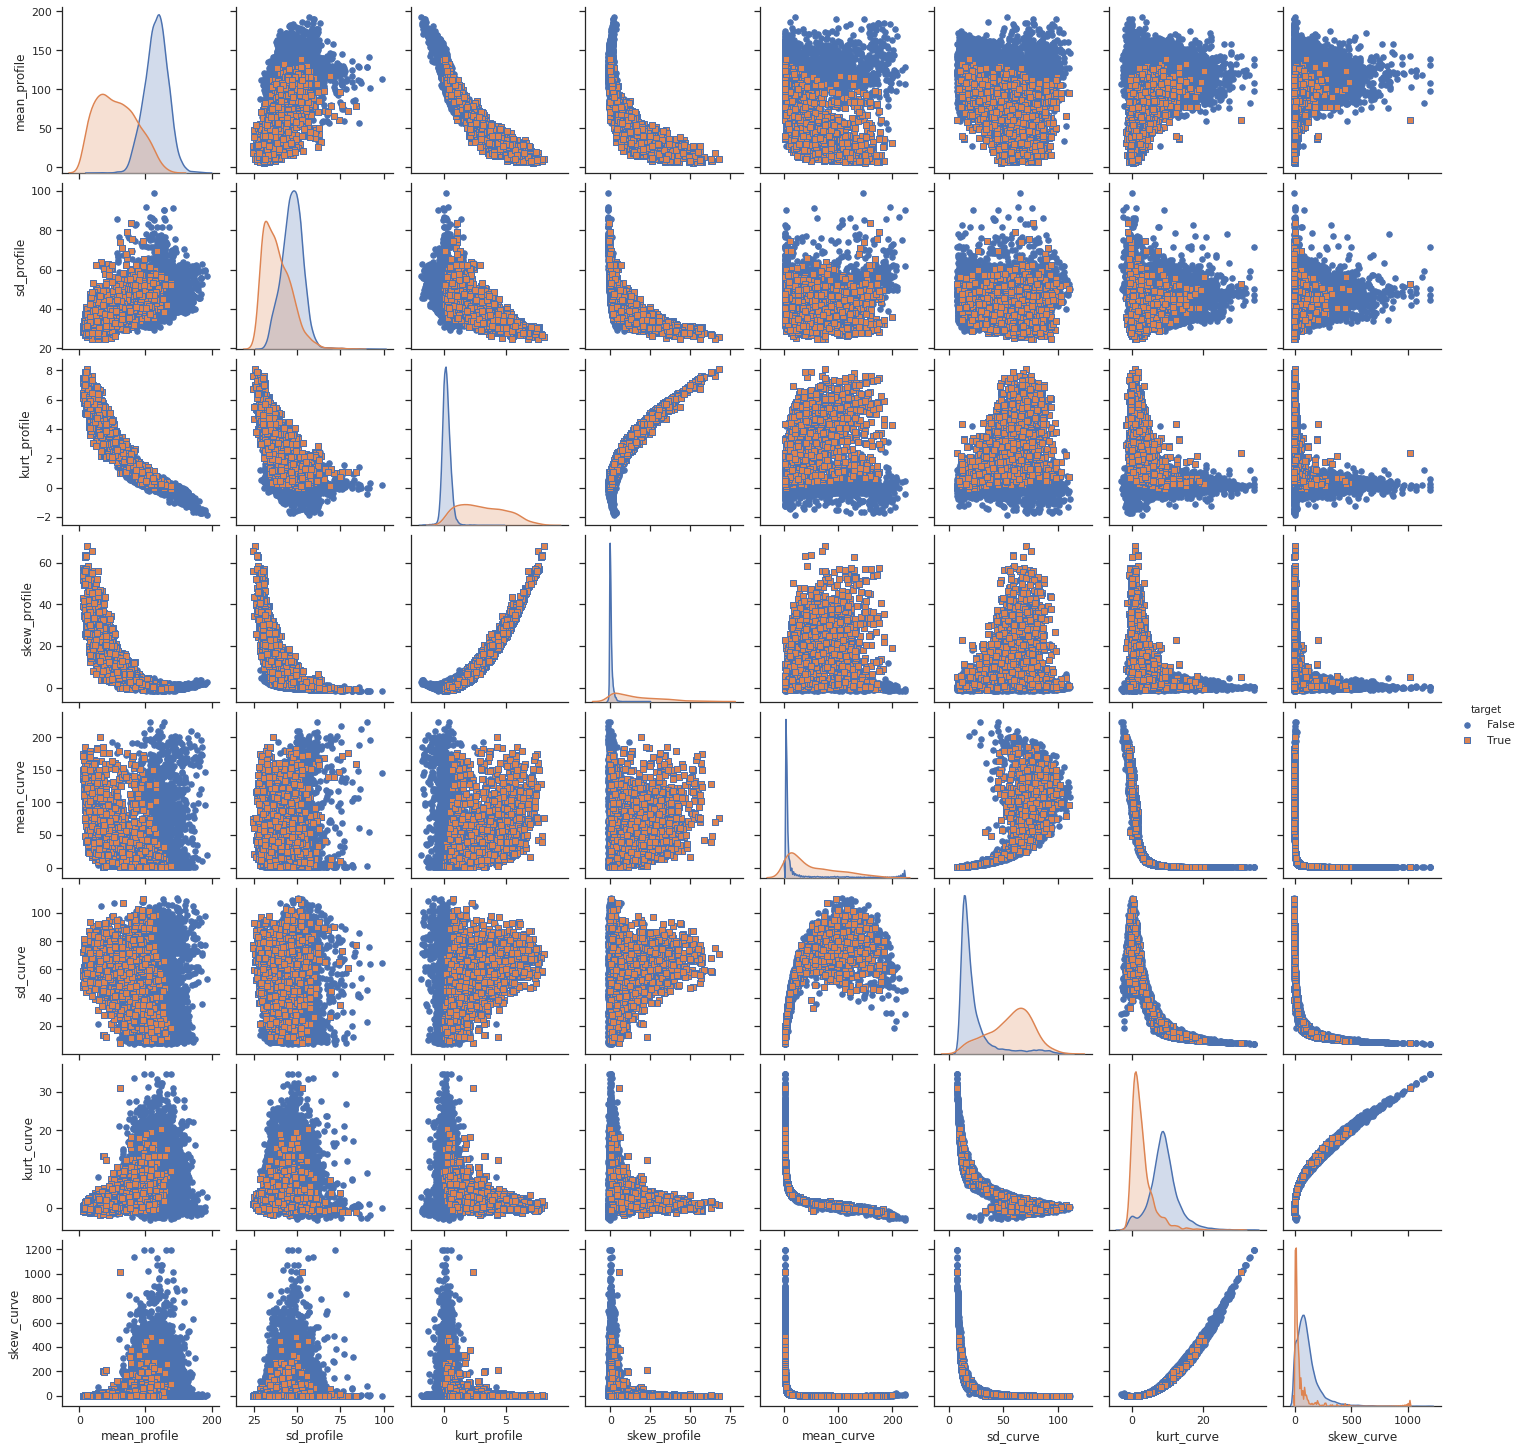

In [16]:
sns.set(style = "ticks", color_codes = True)
g = sns.pairplot(stars, vars = ['mean_profile', 'sd_profile', 'kurt_profile', 'skew_profile', 'mean_curve', 
                                'sd_curve', 'kurt_curve', 'skew_curve'], plot_kws=dict(s=30, edgecolor = 'b', 
                                                                                       linewidth = 1),
                hue = 'target', markers = ["o", "s"], diag_kind = 'kde', diag_kws = dict(shade=True))

## Questão 4

Considerando a variável `mean_profile` de `stars`:

1. Filtre apenas os valores de `mean_profile` onde `target == 0` (ou seja, onde a estrela não é um pulsar).
2. Padronize a variável `mean_profile` filtrada anteriormente para ter média 0 e variância 1.

Chamaremos a variável resultante de `false_pulsar_mean_profile_standardized`.

Encontre os quantis teóricos para uma distribuição normal de média 0 e variância 1 para 0.80, 0.90 e 0.95 através da função `norm.ppf()` disponível em `scipy.stats`.

Quais as probabilidade associadas a esses quantis utilizando a CDF empírica da variável `false_pulsar_mean_profile_standardized`? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [ ]:
def q4():
    # Retorne aqui o resultado da questão 4.
    # filtragem, padronização e calculo de ECDF
    # 1 - filtragem
    filtro = stars[stars['target'] == 0]['mean_profile']
    # 2 - standarization
    stan = (filtro - filtro.mean()) / filtro.std()
    # 3 - ECDF
    ecdf = ECDF(stan)
    # Quantiles
    quantis = sct.norm.ppf([0.8, 0.90, 0.95], loc = 0, scale = 1)
    q80, q90, q95 = quantis[0], quantis[1], quantis[2]
    answer_q4 = tuple(ecdf([quantis[0], quantis[1], quantis[2]]).round(3))
    answer_q4
    return answer_q4

Para refletir:

* Os valores encontrados fazem sentido? Sim.
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?
  Que a padronização fez com que a distribuição que era assimétrica tornar-se simétrica. Após este procedimento, os quantis tendem a ficar próximos a probabilidade.

## Questão 5

Qual a diferença entre os quantis Q1, Q2 e Q3 de `false_pulsar_mean_profile_standardized` e os mesmos quantis teóricos de uma distribuição normal de média 0 e variância 1? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [1]:
def q5():
    # Retorne aqui o resultado da questão 5.
    # filtragem 
    filter = stars[stars['target'] == 0]['mean_profile']
    # standarization
    standarization = sct.zscore(filter)
    # quantiles
    quantis = np.percentile(standarization, [25, 50, 75])
    # quantis da distribuição normal
    quantis_norm = sct.norm.ppf([0.25, 0.50, 0.75])
    answer_q5 = tuple(np.round(quantis - quantis_norm, 3))
    return answer_q5

Para refletir:

* Os valores encontrados fazem sentido?
 sim.
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?
 Que ela tem uma distribuição próxima da normal.
* Curiosidade: alguns testes de hipóteses sobre normalidade dos dados utilizam essa mesma abordagem.